In [164]:
import numpy as np
import seaborn as sns 
import pandas as pd
from tqdm import tqdm
import cv2
from tensorflow.keras.applications import Xception
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

In [162]:
TRAIN_PATH = '../Steel Defect Detection Dataset'
TRAIN_IMAGES = '../Steel Defect Detection Dataset/train_images'
TEST_IMAGES = '../Steel Defect Detection Dataset/test_images'

In [163]:
df_train = pd.read_csv(TRAIN_PATH + '/train.csv')
df_submission = pd.read_csv(TRAIN_PATH + '/sample_submission.csv')

In [96]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [97]:
df_train.shape

(7095, 3)

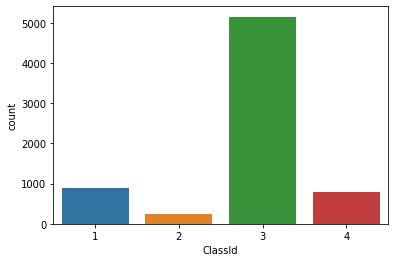

In [98]:
sns.countplot(x= df_train['ClassId'])
plt.show()

In [99]:
img = cv2.imread(TRAIN_IMAGES + '/0002cc93b.jpg')

In [100]:
img

array([[[ 70,  70,  70],
        [ 70,  70,  70],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 48,  48,  48],
        [ 50,  50,  50]],

       [[ 66,  66,  66],
        [ 68,  68,  68],
        [ 68,  68,  68],
        ...,
        [ 48,  48,  48],
        [ 49,  49,  49],
        [ 51,  51,  51]],

       [[ 61,  61,  61],
        [ 64,  64,  64],
        [ 65,  65,  65],
        ...,
        [ 49,  49,  49],
        [ 51,  51,  51],
        [ 54,  54,  54]],

       ...,

       [[155, 155, 155],
        [133, 133, 133],
        [131, 131, 131],
        ...,
        [ 51,  51,  51],
        [ 51,  51,  51],
        [ 50,  50,  50]],

       [[160, 160, 160],
        [111, 111, 111],
        [100, 100, 100],
        ...,
        [ 55,  55,  55],
        [ 54,  54,  54],
        [ 48,  48,  48]],

       [[155, 155, 155],
        [114, 114, 114],
        [ 98,  98,  98],
        ...,
        [ 58,  58,  58],
        [ 58,  58,  58],
        [ 50,  50,  50]]

In [101]:
df_train.head()

,ImageId,ClassId,EncodedPixels
0,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [102]:
len(df_train)

7095

In [103]:
from imutils import paths

In [104]:
for random_image in paths.list_images(TRAIN_IMAGES + '{0002cc93b.jpg}'):
    print(random_image)
    plt.imshow(random_image)
    plt.show()

The class ID for this image is: 1


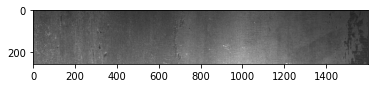

The class ID for this image is: 3


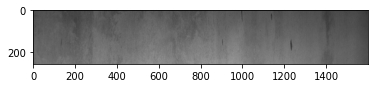

The class ID for this image is: 1


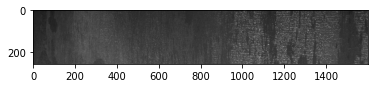

The class ID for this image is: 4


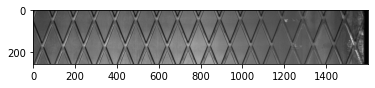

The class ID for this image is: 3


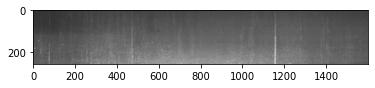

The class ID for this image is: 3


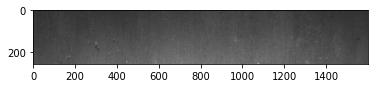

The class ID for this image is: 4


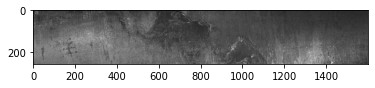

The class ID for this image is: 4


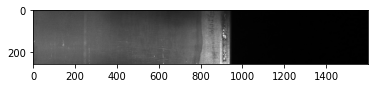

The class ID for this image is: 1


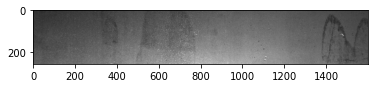

In [105]:
count = 0 
for image_path in paths.list_images(TRAIN_IMAGES):
    print("The class ID for this image is: {}".format(df_train['ClassId'].iloc[count]))
    count = count + 1
    random_image = plt.imread(image_path)
    plt.imshow(random_image)
    plt.show()
    if count == 9:
        break
        

In [106]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:50<00:00, 140.92it/s]


In [107]:
from sklearn.preprocessing import LabelBinarizer

In [108]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [109]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [110]:
images[0]

array([[[0.25882354, 0.25882354, 0.25882354],
        [0.46666667, 0.46666667, 0.46666667],
        [0.23137255, 0.23137255, 0.23137255],
        ...,
        [0.18431373, 0.18431373, 0.18431373],
        [0.21568628, 0.21568628, 0.21568628],
        [0.2       , 0.2       , 0.2       ]],

       [[0.25882354, 0.25882354, 0.25882354],
        [0.30588236, 0.30588236, 0.30588236],
        [0.24705882, 0.24705882, 0.24705882],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.22352941, 0.22352941, 0.22352941],
        [0.19215687, 0.19215687, 0.19215687]],

       [[0.24705882, 0.24705882, 0.24705882],
        [0.24313726, 0.24313726, 0.24313726],
        [0.23529412, 0.23529412, 0.23529412],
        ...,
        [0.20392157, 0.20392157, 0.20392157],
        [0.21960784, 0.21960784, 0.21960784],
        [0.19215687, 0.19215687, 0.19215687]],

       ...,

       [[0.49411765, 0.49411765, 0.49411765],
        [0.5019608 , 0.5019608 , 0.5019608 ],
        [0.44313726, 0

In [111]:
classID[0]

array([1, 0, 0, 0])

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [114]:
len(X_train)

5676

In [115]:
len(X_cv)

1419

In [116]:
type(X_train)

numpy.ndarray

In [117]:
lb.classes_

array([1., 2., 3., 4.], dtype=float32)

In [118]:
from tensorflow.keras.applications import Xception, VGG19, ResNet152, InceptionV3, EfficientNetB0
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras import Model 
from tensorflow.keras.optimizers import Adam

In [119]:
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -5]:
    layer.trainable = False

In [120]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [121]:
final_model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [122]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [123]:
MODEL_SAVE_PATH = "Models/"

In [124]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [125]:
fitted_model = final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv),
                               callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 21s 231ms/step - loss: 0.8039 - accuracy: 0.7280 - val_loss: 0.6277 - val_accuracy: 0.7336
Epoch 2/10
89/89 [==============================] - 21s 235ms/step - loss: 0.5694 - accuracy: 0.7743 - val_loss: 0.5175 - val_accuracy: 0.8048
Epoch 3/10
89/89 [==============================] - 22s 253ms/step - loss: 0.4850 - accuracy: 0.7979 - val_loss: 0.4513 - val_accuracy: 0.8154
Epoch 4/10
89/89 [==============================] - 24s 273ms/step - loss: 0.4261 - accuracy: 0.8178 - val_loss: 0.4800 - val_accuracy: 0.8069
Epoch 5/10
89/89 [==============================] - 25s 285ms/step - loss: 0.4072 - accuracy: 0.8325 - val_loss: 0.4416 - val_accuracy: 0.8154
Epoch 6/10
89/89 [==============================] - 26s 294ms/step - loss: 0.3588 - accuracy: 0.8471 - val_loss: 0.4506 - val_accuracy: 0.8196
Epoch 7/10
89/89 [==============================] - 26s 298ms/step - loss: 0.3507 - accuracy: 0.8522 - val_loss: 0.4824 - val_accuracy: 0.8295

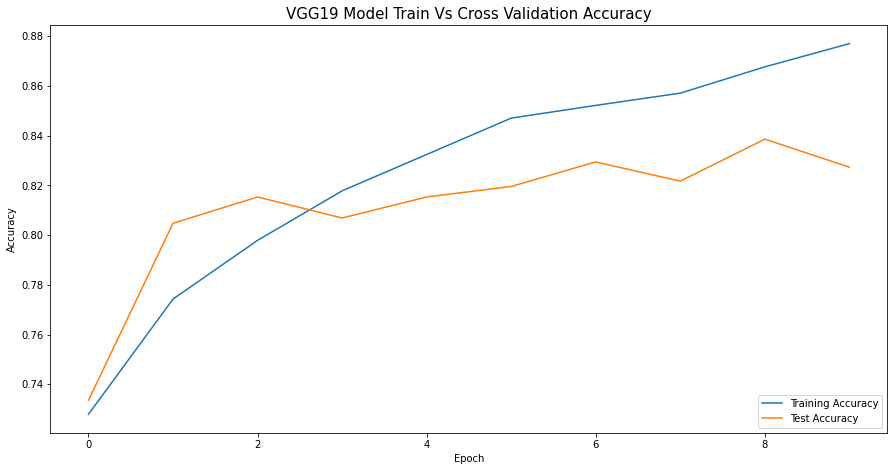

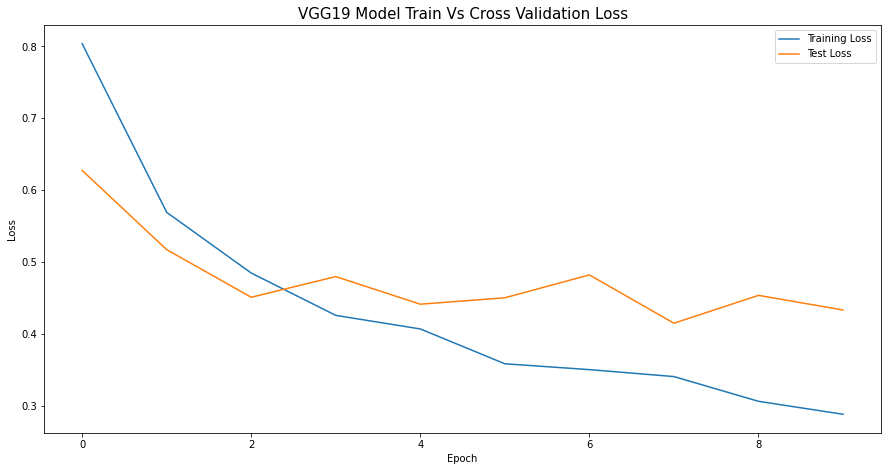

In [126]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_Loss_plot.jpg")
plt.show()


In [127]:
## AveragePooling2D layer size (4, 4) and dropout rate 0.1 
headmodel = VGG19(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (4, 4))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -6]:
    layer.trainable = False

In [128]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [129]:
final_model.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [130]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "VGG19_weights_modified.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [131]:
final_model.fit(X_train, y_train, epochs = 10, validation_data = (X_cv, y_cv), 
                callbacks = checkpoint, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 24s 273ms/step - loss: 0.8051 - accuracy: 0.7213 - val_loss: 0.6063 - val_accuracy: 0.7533
Epoch 2/10
89/89 [==============================] - 24s 273ms/step - loss: 0.5841 - accuracy: 0.7588 - val_loss: 0.5559 - val_accuracy: 0.7646
Epoch 3/10
89/89 [==============================] - 24s 268ms/step - loss: 0.4863 - accuracy: 0.7900 - val_loss: 0.5429 - val_accuracy: 0.7794
Epoch 4/10
89/89 [==============================] - 24s 269ms/step - loss: 0.4482 - accuracy: 0.8143 - val_loss: 0.4736 - val_accuracy: 0.7977
Epoch 5/10
89/89 [==============================] - 24s 269ms/step - loss: 0.4093 - accuracy: 0.8265 - val_loss: 0.5443 - val_accuracy: 0.7703
Epoch 6/10
89/89 [==============================] - 24s 267ms/step - loss: 0.4064 - accuracy: 0.8240 - val_loss: 0.5119 - val_accuracy: 0.8006
Epoch 7/10
89/89 [==============================] - 23s 263ms/step - loss: 0.3619 - accuracy: 0.8481 - val_loss: 0.4796 - val_accuracy: 0.8154

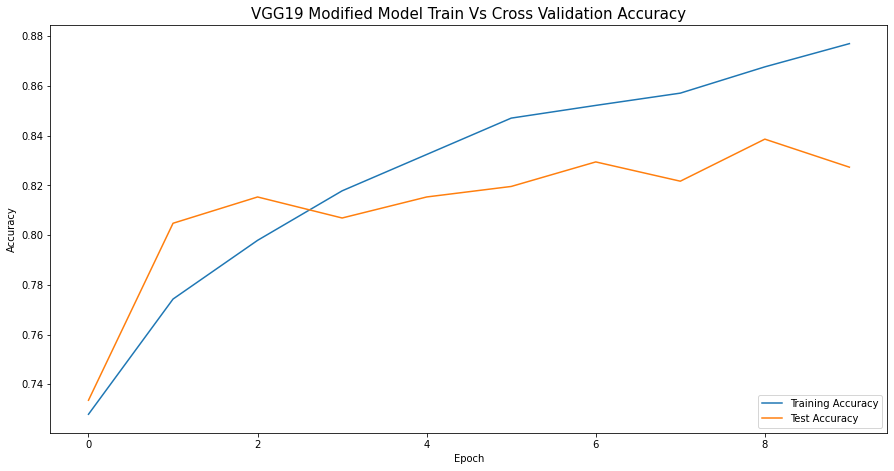

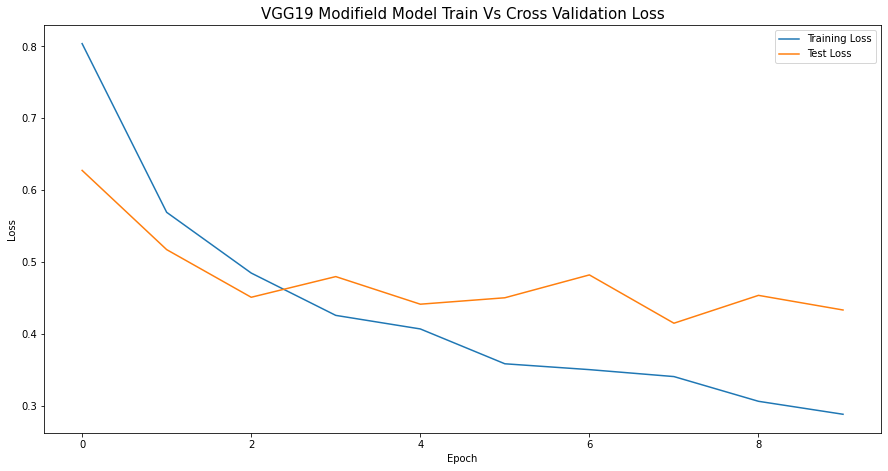

In [132]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('VGG19 Modified Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/VGG19_modified_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('VGG19 Modifield Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/VGG19_modified_Loss_plot.jpg")
plt.show()


In [138]:
headmodel = EfficientNetB0(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (224, 224, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [139]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [140]:
final_model.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 224, 224, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 224, 224, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization_2[0][0]            
______________________________________________________________________________________

In [141]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "EfficientNetB0_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [142]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 10, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 11s 118ms/step - loss: 0.8920 - accuracy: 0.7186 - val_loss: 0.8844 - val_accuracy: 0.7259
Epoch 2/10
89/89 [==============================] - 9s 99ms/step - loss: 0.8713 - accuracy: 0.7259 - val_loss: 0.8636 - val_accuracy: 0.7259
Epoch 3/10
89/89 [==============================] - 9s 97ms/step - loss: 0.8701 - accuracy: 0.7259 - val_loss: 0.8663 - val_accuracy: 0.7259
Epoch 4/10
89/89 [==============================] - 9s 96ms/step - loss: 0.8692 - accuracy: 0.7259 - val_loss: 0.8801 - val_accuracy: 0.7259
Epoch 5/10
89/89 [==============================] - 9s 97ms/step - loss: 0.8706 - accuracy: 0.7259 - val_loss: 0.8667 - val_accuracy: 0.7259
Epoch 6/10
89/89 [==============================] - 9s 99ms/step - loss: 0.8718 - accuracy: 0.7259 - val_loss: 0.8615 - val_accuracy: 0.7259
Epoch 7/10
89/89 [==============================] - 9s 96ms/step - loss: 0.8712 - accuracy: 0.7259 - val_loss: 0.8632 - val_accuracy: 0.7259
Epoch 8/10


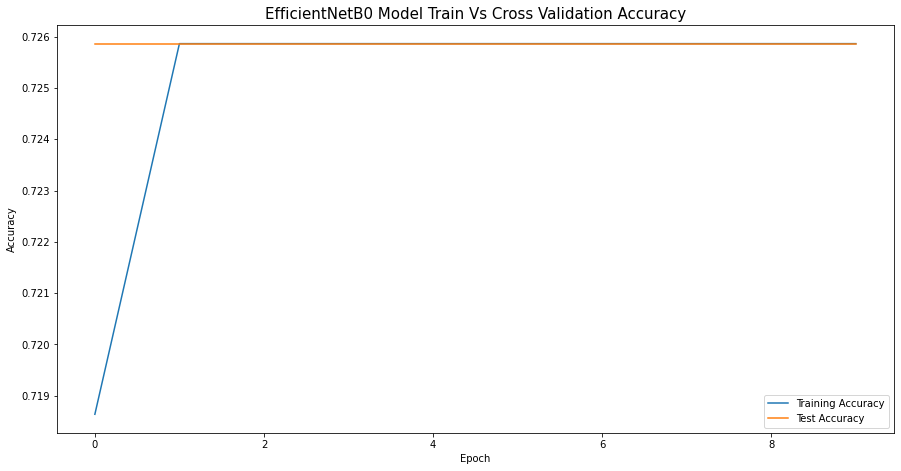

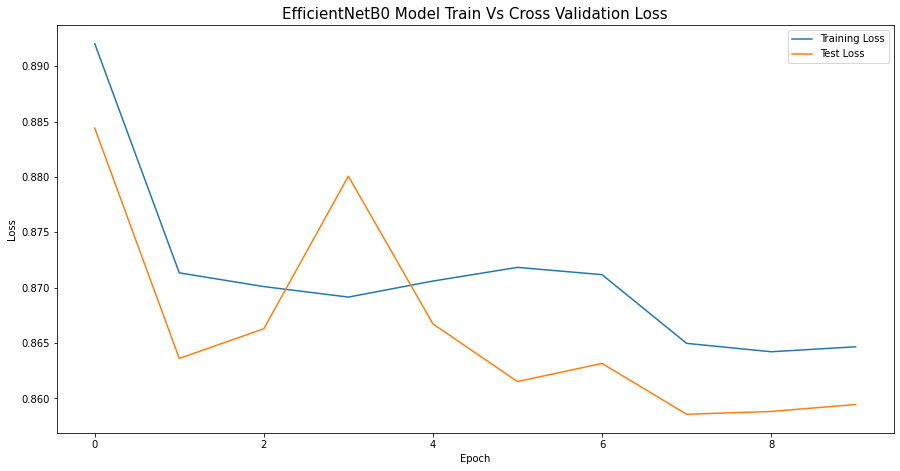

In [143]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('EfficientNetB0 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/EfficientNetB0_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('EfficientNetB0 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/EfficientNetB0_Loss_plot.jpg")
plt.show()


In [144]:
images = []
classID = []
for image_id, class_id, encoded_bits in tqdm(df_train.values):
    img = cv2.imread(TRAIN_IMAGES + '/{}'.format(image_id), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (299, 299))
    img = img / 255
    images.append(img)
    classID.append(class_id)

100%|█████████████████████████████████████████████████████████████████████████████| 7095/7095 [00:54<00:00, 130.67it/s]


In [145]:
images = np.array(images, dtype = np.float32)
classID = np.array(classID, dtype = np.float32)

In [146]:
lb = LabelBinarizer()
classID = lb.fit_transform(classID)

In [147]:
X_train, X_cv, y_train, y_cv = train_test_split(images, classID, test_size = 0.2, 
                                                stratify = classID, random_state = 101)

In [148]:
images.shape

(7095, 299, 299, 3)

In [149]:
headmodel = Xception(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dropout(0.2)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers[: -2]:
    layer.trainable = False

In [150]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [151]:
final_model.summary()

Model: "functional_21"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________

In [152]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "Xception_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [153]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               callbacks = checkpoint, epochs = 10, batch_size = 64)

Epoch 1/10
89/89 [==============================] - 29s 322ms/step - loss: 0.6149 - accuracy: 0.7863 - val_loss: 0.4272 - val_accuracy: 0.8161
Epoch 2/10
89/89 [==============================] - 28s 313ms/step - loss: 0.3580 - accuracy: 0.8525 - val_loss: 0.3894 - val_accuracy: 0.8231
Epoch 3/10
89/89 [==============================] - 28s 316ms/step - loss: 0.3169 - accuracy: 0.8672 - val_loss: 0.3755 - val_accuracy: 0.8337
Epoch 4/10
89/89 [==============================] - 28s 320ms/step - loss: 0.2866 - accuracy: 0.8811 - val_loss: 0.3615 - val_accuracy: 0.8386
Epoch 5/10
89/89 [==============================] - 30s 332ms/step - loss: 0.2519 - accuracy: 0.8939 - val_loss: 0.4053 - val_accuracy: 0.8231
Epoch 6/10
89/89 [==============================] - 30s 334ms/step - loss: 0.2375 - accuracy: 0.8982 - val_loss: 0.3958 - val_accuracy: 0.8316
Epoch 7/10
89/89 [==============================] - 30s 334ms/step - loss: 0.2139 - accuracy: 0.9116 - val_loss: 0.4234 - val_accuracy: 0.8316

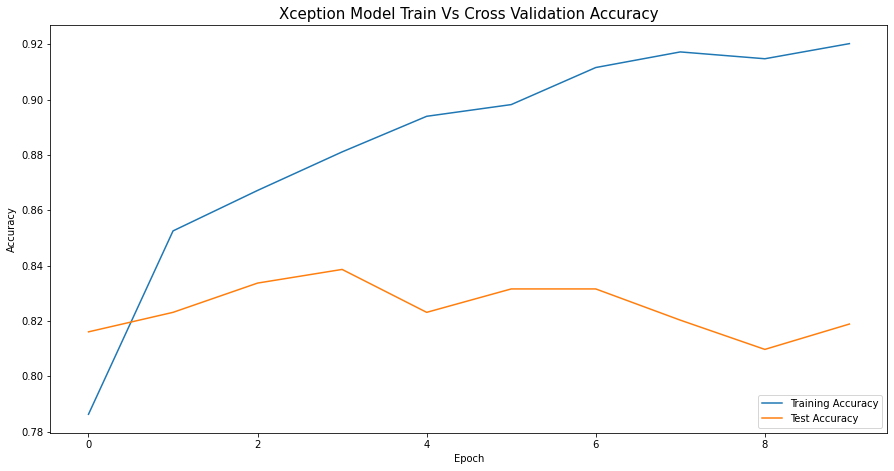

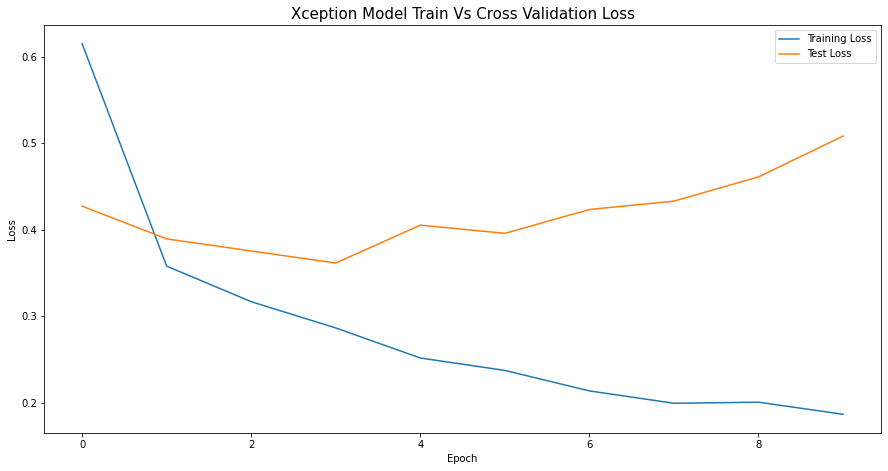

In [154]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('Xception Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/Xception_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('Xception Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/Xception_Loss_plot.jpg")
plt.show()


In [155]:
headmodel = InceptionV3(weights = "imagenet", include_top = False,
             input_tensor = Input(shape = (299, 299, 3)))
model = headmodel.output
model = AveragePooling2D(pool_size= (5, 5))(model)
model = Flatten(name = 'flatten')(model)
model = Dense(512, activation = 'relu')(model)
model = Dense(256, activation = 'relu')(model)
model = Dropout(0.1)(model)
model = Dense(len(lb.classes_), activation = 'softmax')(model)

final_model = Model(inputs = headmodel.input, outputs = model)

for layer in headmodel.layers:
    layer.trainable = False

In [156]:
opt = Adam(lr = 1e-3)
final_model.compile(loss = "categorical_crossentropy", optimizer = opt,
                   metrics = ["accuracy"])

In [157]:
final_model.summary()

Model: "functional_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 149, 149, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_12 (BatchNo (None, 149, 149, 32) 96          conv2d_12[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_12[0][0]     
______________________________________________________________________________________

In [158]:
checkpoint = ModelCheckpoint(MODEL_SAVE_PATH + "InceptionV3_weights.h5", monitor = 'val_loss', verbose = 0, 
                            save_best_only = True, save_weights_only = False,
                            mode = 'auto', save_freq = 'epoch')

In [159]:
fitted_model = final_model.fit(X_train, y_train, validation_data = (X_cv, y_cv), 
               epochs = 10, batch_size = 64, callbacks = checkpoint)

Epoch 1/10
89/89 [==============================] - 20s 221ms/step - loss: 0.6012 - accuracy: 0.7623 - val_loss: 0.4570 - val_accuracy: 0.8097
Epoch 2/10
89/89 [==============================] - 18s 203ms/step - loss: 0.4381 - accuracy: 0.8140 - val_loss: 0.4176 - val_accuracy: 0.8309
Epoch 3/10
89/89 [==============================] - 18s 203ms/step - loss: 0.3830 - accuracy: 0.8349 - val_loss: 0.4133 - val_accuracy: 0.8266
Epoch 4/10
89/89 [==============================] - 18s 201ms/step - loss: 0.3488 - accuracy: 0.8527 - val_loss: 0.4229 - val_accuracy: 0.8344
Epoch 5/10
89/89 [==============================] - 18s 201ms/step - loss: 0.3263 - accuracy: 0.8633 - val_loss: 0.4083 - val_accuracy: 0.8295
Epoch 6/10
89/89 [==============================] - 17s 191ms/step - loss: 0.2936 - accuracy: 0.8724 - val_loss: 0.4261 - val_accuracy: 0.8245
Epoch 7/10
89/89 [==============================] - 17s 191ms/step - loss: 0.2735 - accuracy: 0.8828 - val_loss: 0.4475 - val_accuracy: 0.8288

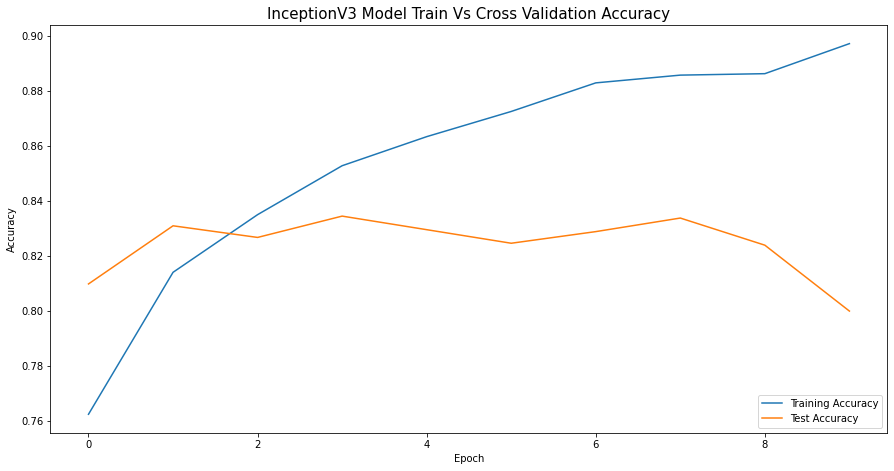

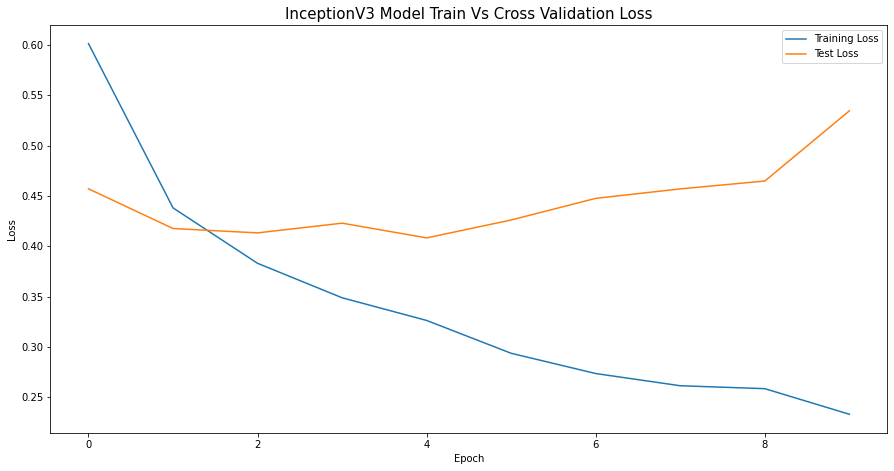

In [160]:
N = 10
plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['accuracy'], label = "Training Accuracy")
plt.plot(np.arange(0, N), fitted_model.history['val_accuracy'], label = "Test Accuracy")
plt.title('InceptionV3 Model Train Vs Cross Validation Accuracy', fontsize = 15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc = 'lower right')
plt.savefig("Plots/InceptionV3_Accuracy_plot.jpg")
plt.show()

plt.figure(figsize = (15, 7.5))
plt.plot(np.arange(0, N), fitted_model.history['loss'], label = "Training Loss")
plt.plot(np.arange(0, N), fitted_model.history['val_loss'], label = "Test Loss")
plt.title('InceptionV3 Model Train Vs Cross Validation Loss', fontsize = 15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc = 'upper right')
plt.savefig("Plots/InceptionV3_Loss_plot.jpg")
plt.show()


In [173]:
for random_value in paths.list_images(TRAIN_IMAGES):
    img = cv2.imread(random_value, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = img / 255
    break

In [177]:
img = np.array(img, dtype = np.float32)

In [178]:
from tensorflow.keras.models import load_model

In [180]:
pretrained_VGG19_model = load_model('Models/VGG19_weights.h5')

In [181]:
pretrained_VGG19_model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [183]:
img.shape

(224, 224, 3)

In [185]:
img = img.reshape((1, 224, 224, 3))

In [186]:
pretrained_VGG19_model.predict(img)

array([[0.85695803, 0.02135569, 0.11982453, 0.00186173]], dtype=float32)

In [188]:
np.argmax(pretrained_VGG19_model.predict(img)) + 1

1